<a href="https://colab.research.google.com/github/jasonlee87/AIDL-Lab/blob/master/04_01_AE_fashion_mnist_h_ml___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***실습 4-1 :  Denoise Auto Encoder*** 


## ***Module Import***

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.0.0


### *Initialize*

In [0]:
# reset of notebook state
tf.keras.backend.clear_session() 

# Tensorflow random seed
tf.random.set_seed(1234)

## ***DataSet***

### *Load*

In [0]:
# select dataset : fashion_mnist or mnist
fashion_mnist_on = False  # True/False

if fashion_mnist_on :
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
else :
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### *Preprocessing*

(60000, 784)
(10000, 784)


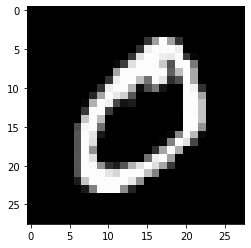

In [0]:
# Add random noise  
noise_on = False  # True/False

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to 2D arrays (60000,28,28) -> (60000,784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

if noise_on : 
  x_train = x_train + 0.1*np.random.randn(x_train.shape[0], 784)
  x_test = x_test + 0.1*np.random.randn(x_test.shape[0], 784)
  print("Noisy Data Selected")

# Print out the shape
print(x_train.shape)
print(x_test.shape)

plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.show()

## ***Model***

### *Define*

In [0]:
# Size of encoded representation
# 32 floats denotes a compression factor of 24.5 assuming input is 784 float
encoding_dim = 32

# Input placeholder
i_input = keras.layers.Input(shape=(784,))

# Encoded representation of input image
encode_1 = keras.layers.Dense(encoding_dim, activation='sigmoid')(i_input)
encode_2 = keras.layers.Dense(encoding_dim, activation='sigmoid', \
              activity_regularizer=keras.regularizers.l1(0.0005))(i_input)

# Decode is lossy reconstruction of input              
decoded_1 = keras.layers.Dense(784, activation='sigmoid')(encode_1)
decoded_2 = keras.layers.Dense(784, activation='sigmoid')(encode_2)

In [0]:
# This autoencoder will map input to reconstructed output
autoencoder1 = keras.models.Model(inputs=i_input, outputs=decoded_1)
autoencoder2 = keras.models.Model(inputs=i_input, outputs=decoded_2)

In [0]:
# Select optimizer and loss function
autoencoder1.compile(optimizer='rmsprop', loss='mse') 
autoencoder2.compile(optimizer='rmsprop', loss='mse')
autoencoder1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### *Fit*

Epoch 100/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0640 - val_loss: 0.0636
CPU times: user 1min 27s, sys: 9.37 s, total: 1min 37s

Wall time: 1min 12s (@Notebook Setting/GPU)

In [0]:
%%time
autoencoder1.fit(x_train, x_train,
                epochs=100,
                batch_size=512,
                validation_freq=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0960
Epoch 2/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0675
Epoch 3/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0673
Epoch 4/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0673
Epoch 5/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0673
Epoch 6/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0673
Epoch 7/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0673
Epoch 8/100
60000/60000 [==============================] - 1s 9us/sample - loss: 0.0673
Epoch 9/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0673
Epoch 10/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0673 - val_loss: 0.0675
Epoch 11/100
60000/60000 [===============

Epoch 100/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0172 - val_loss: 0.0170
CPU times: user 1min 14s, sys: 8.23 s, total: 1min 22s

Wall time: 1min 15s

In [0]:
%%time
autoencoder2.fit(x_train, x_train,
                epochs=100,
                batch_size=512,
                validation_freq=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1112
Epoch 2/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0761
Epoch 3/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0620
Epoch 4/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0525
Epoch 5/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0464
Epoch 6/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0422
Epoch 7/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0389
Epoch 8/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0364
Epoch 9/100
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0342
Epoch 10/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0325 - val_loss: 0.0314
Epoch 11/100
60000/60000 [==============

### *Predict*

In [0]:
decoded_imgs1 = autoencoder1.predict(x_test)
decoded_imgs2 = autoencoder2.predict(x_test)

## ***Analysis***

### *Plot*

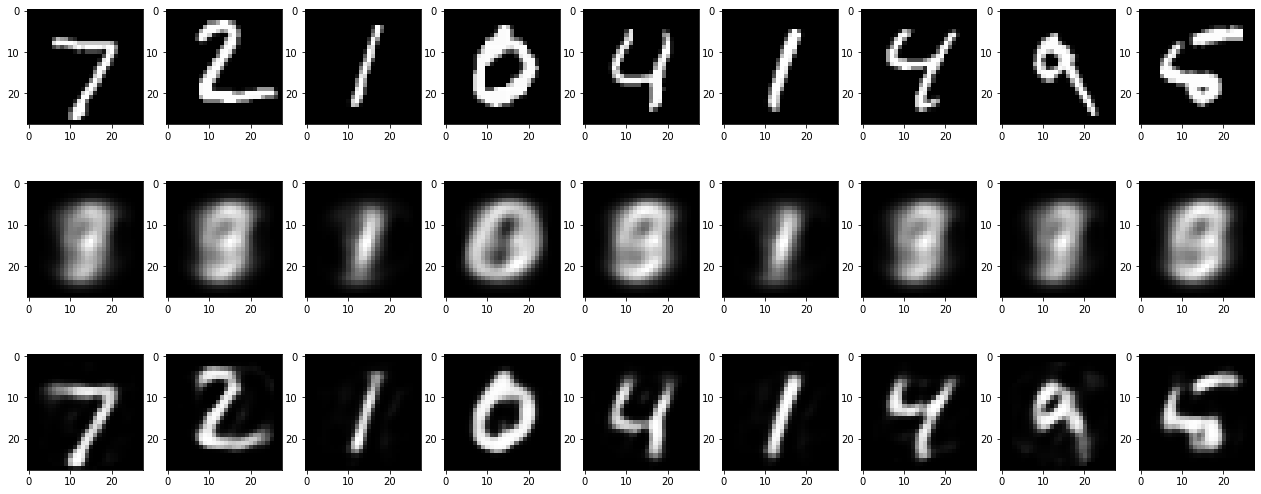

In [0]:
# use Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 9))

num_imgs = 9

for i in range(num_imgs):                        
    # display original
    ax = plt.subplot(3, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img, cmap='gray')

    # display reconstruction 1
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs1[i].reshape(28,28)
    plt.imshow(reconstructed_img, cmap='gray')

    # display reconstruction 2
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs*2)
    reconstructed_img = decoded_imgs2[i].reshape(28,28)
    plt.imshow(reconstructed_img, cmap="gray")

plt.show()

## ***실습과제***

#### *과제 1. 두 모델의 차이를 확인해 보자* 


#### *과제 2. Data set에 noise 가 추가 되는 경우 어떻게 동작하는지 확인해 보자*
>#### *1. dataset을 읽어 오는 cell 에서 "noise_on = False" 를 "True"로 변경*
>#### *2. Noisy data로 다시 학습 및 추론 해 보자. 결과가 무엇을 의미 하는가?*


### *과제 3. Noisy data로 학습된 모델에 정상 data를 사용하여 추론하면?*
>#### *1. 결과를 추측해 보자*
>#### *2. 실험결과와 추측이 동일한가? 결과를 설명해 보자*